In [1]:
import sys, os

In [2]:
workDir = os.path.abspath('..')

everestDir = os.path.join(workDir, 'resources', 'everest')
if not everestDir in sys.path:
    sys.path.insert(0, everestDir)

dataDir = os.path.join(workDir, 'data')

In [3]:
import pandas as pd
import numpy as np

from everest.h5anchor import Reader, Fetch
from everest.window import Canvas
%matplotlib inline

In [4]:
def get_inputs(scope):
    inputs = pd.DataFrame(reader[scope : 'inputs']).transpose()
    toDrop = [col for col in inputs.columns if len(set(inputs[col])) == 1]
#     if 'innerMethod' in inputs:
#         inputs = inputs.drop('innerMethod', axis = 1)
    inputs = inputs.drop(toDrop, axis = 1)
    for col in inputs:
        try:
            inputs[col] = inputs[col].astype(float)
        except ValueError:
            pass
    inputs = inputs.sort_values(list(inputs.columns))
#     inputs = inputs.dropna()
    return inputs

In [5]:
reader = Reader('merged', dataDir)

In [6]:
isoviscs = reader[Fetch('*/type') == 'Isovisc']
arrheniuses = reader[Fetch('*/type') == 'Arrhenius']
viscoplastics = reader[Fetch('*/type') == 'Viscoplastic']

In [7]:
isoInputs = get_inputs(isoviscs)
isoInputs = isoInputs.drop(['initial', 'innerMethod'], axis = 1)
isoInputs['alpha'] = isoInputs['alpha'].apply(np.log10)

/home/morpheus/workspace/mount/resources/everest/everest/h5anchor/reader.py:166: UserWarning: No recognisable tag on string: _class_import numpy as np
from p
  warnings.warn(f"No recognisable tag on string: {inp[:32]}")
/home/morpheus/workspace/mount/resources/everest/everest/h5anchor/reader.py:166: UserWarning: No recognisable tag on string: _built_peaskauslu-thoesfthuec
  warnings.warn(f"No recognisable tag on string: {inp[:32]}")
/home/morpheus/workspace/mount/resources/everest/everest/h5anchor/reader.py:166: UserWarning: No recognisable tag on string: _built_eitrietreobl-uisliuiozhoo
  warnings.warn(f"No recognisable tag on string: {inp[:32]}")
/home/morpheus/workspace/mount/resources/everest/everest/h5anchor/reader.py:166: UserWarning: No recognisable tag on string: _built_okruezhiobl-xaeglsniekr
  warnings.warn(f"No recognisable tag on string: {inp[:32]}")
/home/morpheus/workspace/mount/resources/everest/everest/h5anchor/reader.py:166: UserWarning: No recognisable tag on string: 

In [ ]:
# for k, v in dict(list(isoInputs.groupby('temperatureField'))).items():
#     print(k, len(v))
# Almost all of these are sinu freq 1 IC; they appear complete up to aspect 2:
sinuIsoInputs = isoinputs.loc[isoinputs['temperatureField'] == '_built_peaskauslu-thoesfthuec']
sinuIsoInputs = dict(list(sinuIsoInputs.groupby(['aspect', 'f'])['alpha']))

In [ ]:
arrInputs = get_inputs(arrheniuses)
arrInputs['alpha'] = arrInputs['alpha'].apply(np.log10)

In [ ]:
for k, v in dict(list(arrInputs.groupby('temperatureField'))).items():
    print(k, len(v))
# Almost all of these are sinu freq 1 IC; they appear complete:
sinuArrInputs = arrInputs.loc[arrInputs['temperatureField'] == '_built_peaskauslu-thoesfthuec']
sinuArrInputs = dict(list(sinuArrInputs.groupby(['aspect', 'f'])['alpha']))

In [8]:
plasticInputs = get_inputs(viscoplastics)
plasticInputs = plasticInputs.loc[plasticInputs['tauRef'] > 1e4]
plasticInputs['tauRef'] = plasticInputs['tauRef'].apply(np.log10)
plasticInputs = plasticInputs.drop('innerMethod', axis = 1)

/home/morpheus/workspace/mount/resources/everest/everest/h5anchor/reader.py:166: UserWarning: No recognisable tag on string: _built_oiskeaosle-woatihoo
  warnings.warn(f"No recognisable tag on string: {inp[:32]}")
/home/morpheus/workspace/mount/resources/everest/everest/h5anchor/reader.py:166: UserWarning: No recognisable tag on string: _built_wrusnidwa-scoescnaap
  warnings.warn(f"No recognisable tag on string: {inp[:32]}")
/home/morpheus/workspace/mount/resources/everest/everest/h5anchor/reader.py:166: UserWarning: No recognisable tag on string: _built_kleblswofr-ghaguileu
  warnings.warn(f"No recognisable tag on string: {inp[:32]}")
/home/morpheus/workspace/mount/resources/everest/everest/h5anchor/reader.py:166: UserWarning: No recognisable tag on string: _built_wraoyoopri-oesfiebroith
  warnings.warn(f"No recognisable tag on string: {inp[:32]}")
/home/morpheus/workspace/mount/resources/everest/everest/h5anchor/reader.py:166: UserWarning: No recognisable tag on string: _built_iiscap

In [ ]:
nonSinus = plasticInputs.loc[plasticInputs['temperatureField'].apply(
    lambda s: not s in {'_built_peaskauslu-thoesfthuec', '_built_oiskeaosle-woatihoo'}
    )]

In [ ]:
nonSinus

In [ ]:
dict(list(plasticInputs.groupby(['temperatureField', 'aspect', 'f'])['tauRef']))

_built_chifruequ-iokwoeuefroo 3
_built_eswaoscoeh-scuispyiips 3
_built_friobrdrasw-eoxiodioz 3
_built_iiscaplaaz-puphiuria 3
_built_oghoaklaos-oifouscay 3
_built_oiskeaosle-woatihoo 93
_built_peaskauslu-thoesfthuec 496
_built_stiambaesp-fludrshuezh 1
_built_uogliiiuslu-qaubfliuv 3
_built_wrusnidwa-scoescnaap 3


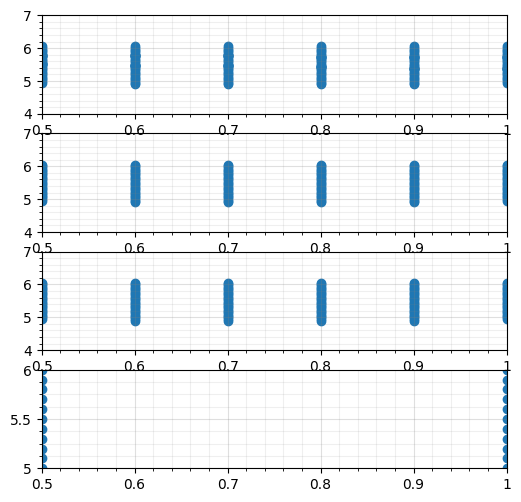

In [9]:
for k, v in dict(list(plasticInputs.groupby('temperatureField'))).items():
    print(k, len(v))
# Almost all of these are sinu freq 1 or 2 IC; they appear complete.
freq1s = dict(list(plasticInputs.groupby('temperatureField')))['_built_peaskauslu-thoesfthuec']
aspects = sorted(set(freq1s['aspect']))
canvas = Canvas(size = (6, 6), shape = (len(aspects), 1))
for i, aspect in enumerate(aspects):
    subFrm = freq1s.loc[freq1s['aspect'] == aspect]
    ax = canvas.make_ax(place = (i, 0))
    ax.scatter(subFrm['f'], subFrm['tauRef'])
canvas.show()

_built_chifruequ-iokwoeuefroo 3
_built_eswaoscoeh-scuispyiips 3
_built_friobrdrasw-eoxiodioz 3
_built_iiscaplaaz-puphiuria 3
_built_oghoaklaos-oifouscay 3
_built_oiskeaosle-woatihoo 93
_built_peaskauslu-thoesfthuec 496
_built_stiambaesp-fludrshuezh 1
_built_uogliiiuslu-qaubfliuv 3
_built_wrusnidwa-scoescnaap 3


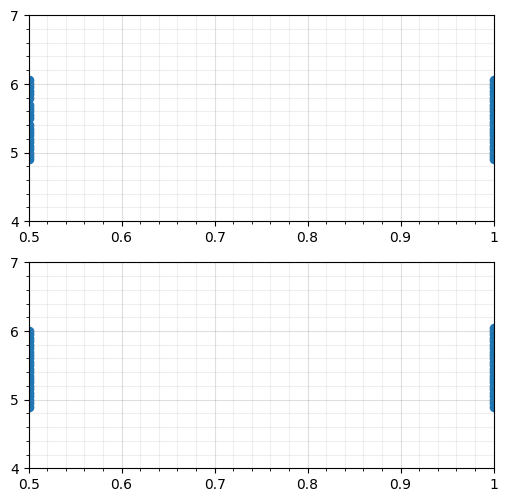

In [11]:
for k, v in dict(list(plasticInputs.groupby('temperatureField'))).items():
    print(k, len(v))
# Almost all of these are sinu freq 1 or 2 IC; they appear complete.
freq2s = dict(list(plasticInputs.groupby('temperatureField')))['_built_oiskeaosle-woatihoo']
aspects = sorted(set(freq2s['aspect']))
canvas = Canvas(size = (6, 6), shape = (len(aspects), 1))
for i, aspect in enumerate(aspects):
    subFrm = freq1s.loc[freq2s['aspect'] == aspect]
    ax = canvas.make_ax(place = (i, 0))
    ax.scatter(subFrm['f'], subFrm['tauRef'])
canvas.show()

In [12]:
aspects

[1.0, 1.414]